# Artist age analysis

Let's try to see, whether artist's age affects song popularity.
For this purpose we calculate new value: age of singer at song's release.

In [109]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re

In [268]:
df = pd.read_csv('final_cleaned.csv', encoding='utf-8')

# add column with release year of a song
df['release_date'] = df.release_date.apply(lambda x: re.match('\d{4}', x)[0])

# change the type to numeric
df = df.astype({'release_date': 'int64'})

# calculate and save to column age at release
df['age_at_release'] = df['release_date'] - df['birth_year']

Now when we have new variable, we can see how it correlates with song popularity 

Correlation:  -0.19


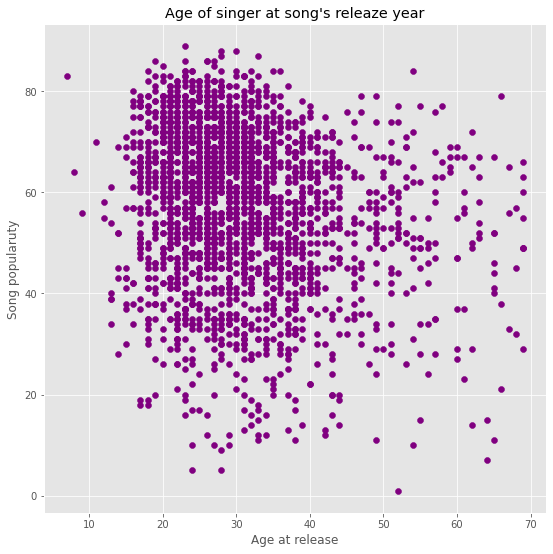

In [269]:
# plot and calculate correlation
plt.figure(figsize = (9,9))
plt.scatter(df_filtered_release_age['age_at_release'], df_filtered_release_age['song_popularity'], marker='o', color='purple')
plt.xlabel('Age at release')
plt.ylabel('Song popularuty')

plt.title("Age of singer at song's releaze year")

release_age_corr = df_filtered_release_age[['song_popularity', 'age_at_release']].corr().song_popularity.age_at_release

print('Correlation: ', round(release_age_corr, 2))

Seems like correlation is weak. Let's see how the variable behaves among the other factors. Maybe there is some difference between genders and countries?
We can use facet grid to biuld multiple plots that involve other variables. 

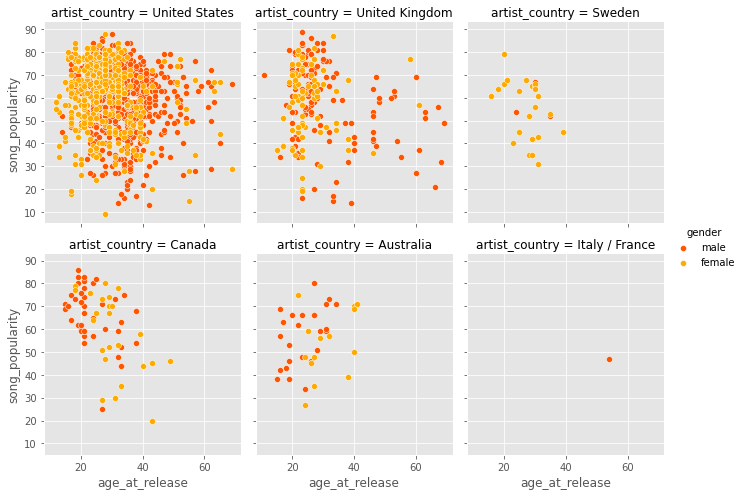

In [270]:
# making artist related DataFrame
artist_info_df = df[['song_popularity', 'artist_name', 'artist_popularity', 'artist_follower_no', 'artist_genres', 'artist_country', 'gender', 'age_at_release']]
artist_info_df_no_nan = artist_info_df.dropna()

# excluding unnatural age values
artist_info_filtered_age = artist_info_df_no_nan[(artist_info_df_no_nan['age_at_release'] > 0) & (artist_info_df_no_nan['age_at_release'] < 70)]

#plotting the graph for each country
c = sns.FacetGrid(artist_info_filtered_age, col='artist_country', hue="gender",height=3.5, aspect=.9, col_wrap=3, palette = 'autumn')

c.map_dataframe(sns.scatterplot, x='age_at_release', y='song_popularity')

c.add_legend()

For US we have the most of the data. We can see on the graph that songs of woman after their 30 become less popular,
and at age 35 women at most quit singing.
For man, the career path seems to be smoother, and the songs of those, who keeps singing after 40, tend to be at least not that bad.
Let's now see the overall songs popularuty for each gender:

In [271]:
# comparing song popularity among genders - looks the same
artist_info_df.groupby('gender')['song_popularity'].mean()

gender
female    58.786982
male      58.732225
Name: song_popularity, dtype: float64

In [212]:
artist_info_df.groupby('gender')['artist_popularity'].mean()

gender
female    71.246677
male      66.340720
Name: artist_popularity, dtype: float64

In [263]:
artist_info_df.groupby('gender').count()

,song_popularity,artist_name,artist_popularity,artist_follower_no,artist_genres,artist_country,age_at_release
gender,,,,,,,
female,677,677,677,677,667,676,615
male,1083,1083,1083,1083,1065,1083,1001


Now let's build the same graph for each gender, but for all the countries and see, whether we receive the same picture?

Text(0.5, 1.05, "Song popularity by singer's age, different genders")

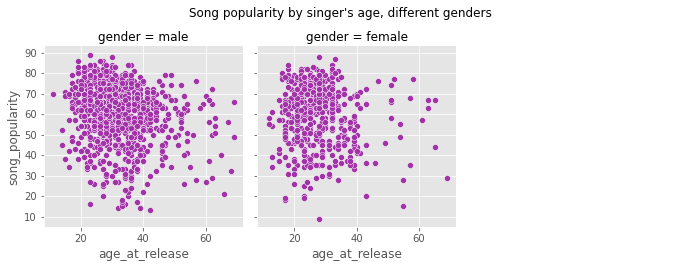

In [275]:
# plotting song popularuty - age at release scatter plot
sns.set_palette(['#a232a8'], n_colors=1)

a = sns.FacetGrid(artist_info_filtered_age, col="gender", height=3.5, aspect=.9, col_wrap=3)

a.map_dataframe(sns.scatterplot, x='age_at_release', y='song_popularity')
a.add_legend()
a.fig.suptitle(t="Song popularity by singer's age, different genders", y='1.05')

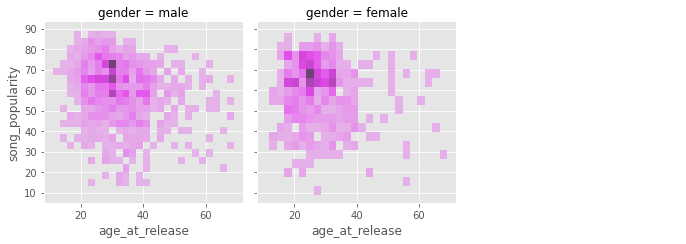

In [276]:
# another look to see density

b = sns.FacetGrid(artist_info_filtered_age, col="gender",height=3.5, aspect=.9, col_wrap=3)
b.map_dataframe(sns.histplot, x='age_at_release', y='song_popularity')
b.add_legend()

We see the same picture: after ~32 years women dramatically lose the popularuty of their songs, and after age 40 most of them stop releasing new songs.
Also we can notice, that both women and men sing the most popular songs before they turn 35.
So this is the way that singer's age affects song popularuty.